# Rf 1 0 1_Basics
This tutorial illustrates the basic features of RooFit.




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:39 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Set up model
---------------------
Declare variables x,mean,sigma with associated name, title, initial
value and allowed range

In [2]:
x = ROOT.RooRealVar("x", "x", -10, 10)
mean = ROOT.RooRealVar("mean", "mean of gaussian", 1, -10, 10)
sigma = ROOT.RooRealVar("sigma", "width of gaussian", 1, 0.1, 10)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Build gaussian p.d.f in terms of x,mean and sigma

In [3]:
gauss = ROOT.RooGaussian("gauss", "gaussian PDF", x, mean, sigma)

Construct plot frame in 'x'

In [4]:
xframe = x.frame(ROOT.RooFit.Title("Gaussian p.d.f."))  # RooPlot

Plot model and change parameter values
---------------------------------------------------------------------------
Plot gauss in frame (i.e. in x)

In [5]:
gauss.plotOn(xframe)

<ROOT.RooPlot object ("frame_x_55a0b648b600") at 0x55a0b648b600>

Change the value of sigma to 3

In [6]:
sigma.setVal(3)

Plot gauss in frame (i.e. in x) and draw frame on canvas

In [7]:
gauss.plotOn(xframe, ROOT.RooFit.LineColor(ROOT.kRed))

<ROOT.RooPlot object ("frame_x_55a0b648b600") at 0x55a0b648b600>

Generate events
-----------------------------
Generate a dataset of 1000 events in x from gauss

In [8]:
data = gauss.generate(ROOT.RooArgSet(x), 10000)  # ROOT.RooDataSet

Make a second plot frame in x and draw both the
data and the p.d.f in the frame

In [9]:
xframe2 = x.frame(ROOT.RooFit.Title(
    "Gaussian p.d.f. with data"))  # RooPlot
data.plotOn(xframe2)
gauss.plotOn(xframe2)

<ROOT.RooPlot object ("frame_x_55a0b66f9640") at 0x55a0b66f9640>

Fit model to data
-----------------------------
Fit pdf to data

In [10]:
gauss.fitTo(data)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         1.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 sigma        3.00000e+00  9.90000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=25019.2 FROM MIGRAD    STATUS=INITIATE       10 CALLS          11 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX 

Print values of mean and sigma (that now reflect fitted values and
errors)

In [11]:
mean.Print()
sigma.Print()

RooRealVar::mean = 1.01746 +/- 0.0300144  L(-10 - 10) 
RooRealVar::sigma = 2.9787 +/- 0.0219217  L(0.1 - 10) 


Draw all frames on a canvas

In [12]:
c = ROOT.TCanvas("rf101_basics", "rf101_basics", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.6)
xframe.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
xframe2.GetYaxis().SetTitleOffset(1.6)
xframe2.Draw()

c.SaveAs("rf101_basics.png")

Info in <TCanvas::Print>: png file rf101_basics.png has been created


Draw all canvases 

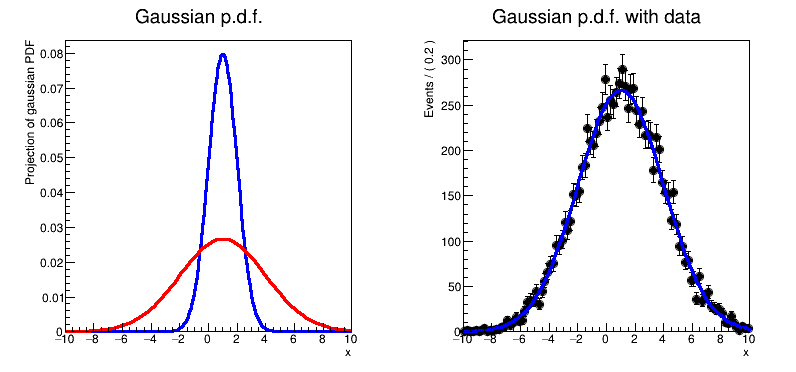

In [13]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()